# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [74]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [75]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("newsapi")

In [76]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [77]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [78]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [79]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        btc_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc_df  = pd.DataFrame(btc_sentiments)
btc_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.6369,0.0,0.887,0.113,Some things are best left a mystery at least a...
1,0.0000,0.0,0.000,0.000,
2,0.7041,0.0,0.860,0.140,"Bitcoin is the future, again: this morning, it..."
3,0.8316,0.0,0.754,0.246,TL;DR: Enter the The Complete Bitcoin (BTC) In...
4,0.1027,0.0,0.958,0.042,New York (CNN Business)Bitcoin's roller coaste...


In [80]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        eth_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth_df  = pd.DataFrame(eth_sentiments)
eth_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...
1,-0.4588,0.145,0.789,0.066,NFTs are the latest cryptocurrency rage these ...
2,0.4404,0.000,0.909,0.091,NFTs (non-fungible tokens) — or scarce digital...
3,0.0258,0.000,0.970,0.030,While the first Christie's auction of digital ...
4,0.7096,0.000,0.856,0.144,Attempting to get ahead of cryptocurrency mine...


In [81]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,18.000000,18.000000,18.00000,18.000000
mean,0.233672,0.011500,0.86850,0.064389
std,0.345377,0.035387,0.23038,0.072475
min,-0.361200,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.85625,0.000000
50%,0.051350,0.000000,0.92650,0.056000
75%,0.559650,0.000000,1.00000,0.108000
max,0.831600,0.137000,1.00000,0.246000


In [82]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.237070,0.019200,0.906100,0.074700
std,0.370410,0.043104,0.070778,0.062607
min,-0.458800,0.000000,0.754000,0.000000
25%,0.000000,0.000000,0.861750,0.022500
50%,0.307100,0.000000,0.915500,0.073500
75%,0.473275,0.000000,0.946750,0.096500
max,0.831600,0.145000,1.000000,0.246000


### Questions:

**Important note:** The sample answers may vary depending on when this code is running since news may change over time.

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin 

Q. Which coin had the highest positive score?

A: Bitcoin 

---

## 2. Natural Language Processing
---
###   Tokenize

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word,
2. Remove punctuation.
3. Remove stopwords.

In [85]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [86]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append("'t")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [87]:
# Complete the tokenizer function
def tokenize(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [88]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df.text.apply(tokenize)
btc_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.6369,0.0,0.887,0.113,Some things are best left a mystery at least a...,"[thing, best, left, mystery, least, far, Coinb..."
1,0.0000,0.0,0.000,0.000,,[]
2,0.7041,0.0,0.860,0.140,"Bitcoin is the future, again: this morning, it...","[Bitcoin, future, morning, hit, all-time, high..."
3,0.8316,0.0,0.754,0.246,TL;DR: Enter the The Complete Bitcoin (BTC) In...,"[TL, DR, Enter, Complete, Bitcoin, BTC, Invest..."
4,0.1027,0.0,0.958,0.042,New York (CNN Business)Bitcoin's roller coaste...,"[New, York, CNN, Business, Bitcoin, roller, co..."


In [90]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df.text.apply(tokenize)
eth_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...,"[Worried, GeForce, RTX, 3060, sold, cryptocurr..."
1,-0.4588,0.145,0.789,0.066,NFTs are the latest cryptocurrency rage these ...,"[NFTs, latest, cryptocurrency, rage, day, band..."
2,0.4404,0.000,0.909,0.091,NFTs (non-fungible tokens) — or scarce digital...,"[NFTs, non-fungible, token, —, scarce, digital..."
3,0.0258,0.000,0.970,0.030,While the first Christie's auction of digital ...,"[first, Christie, auction, digital, artwork, b..."
4,0.7096,0.000,0.856,0.144,Attempting to get ahead of cryptocurrency mine...,"[Attempting, get, ahead, cryptocurrency, miner..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [91]:
from collections import Counter
from nltk import ngrams

In [92]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenize(btc_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Reuters'), 5),
 (('Reuters', 'Staff'), 5),
 (('Staff', 'FILE'), 3),
 (('FILE', 'PHOTO'), 3),
 (('virtual', 'currency'), 3),
 (('illustration', 'taken'), 3),
 (('cryptocurrency', 'exchange'), 2),
 (('all-time', 'high'), 2),
 (('Investment', 'Giveaway'), 2),
 (('19', '2021'), 2),
 (('currency', 'Bitcoin'), 2),
 (('taken', 'January'), 2),
 (('2021', 'REUTERS/Dado'), 2),
 (('1', 'trillion'), 2),
 (('poster', 'participating'), 2),
 (('thing', 'best'), 1),
 (('best', 'left'), 1),
 (('left', 'mystery'), 1),
 (('mystery', 'least'), 1),
 (('least', 'far'), 1)]

In [93]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenize(eth_df.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Reuters'), 6),
 (('Reuters', 'Staff'), 6),
 (('record', 'high'), 4),
 (('char', 'NFTs'), 3),
 (('Staff', 'SINGAPORE'), 3),
 (('RTX', '3060'), 2),
 (('cryptocurrency', 'miner'), 2),
 (('non-fungible', 'token'), 2),
 (('token', '—'), 2),
 (('char', 'NEW'), 2),
 (('NEW', 'YORK'), 2),
 (('Reuters', 'Ethereum'), 2),
 (('Ethereum', 'second'), 2),
 (('second', 'largest'), 2),
 (('largest', 'cryptocurrency'), 2),
 (('cryptocurrency', 'term'), 2),
 (('term', 'market'), 2),
 (('market', 'capitalization'), 2),
 (('capitalization', 'volume'), 2),
 (('volume', 'hit'), 2)]

In [94]:
# Function token_count generates the top 10 words for a given coin & Returns the most frequent tokens
def count_tokens(tokens, N=3):
    return Counter(tokens).most_common(N)

In [95]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = tokenize(btc_df.text.str.cat())
count_tokens(btc_tokens, 10)

[('char', 17),
 ('Bitcoin', 11),
 ('Reuters', 9),
 ('cryptocurrency', 5),
 ('Staff', 5),
 ('2021', 4),
 ('exchange', 3),
 ('morning', 3),
 ('high', 3),
 ('trading', 3)]

In [96]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = tokenize(eth_df.text.str.cat())
count_tokens(eth_tokens, 10)

[('char', 20),
 ('Reuters', 13),
 ('Ethereum', 8),
 ('cryptocurrency', 7),
 ('Staff', 6),
 ('new', 5),
 ('week', 5),
 ('high', 5),
 ('token', 4),
 ('record', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [102]:
def coin_cloud(text, title=""):
    btc_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(btc_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
    
# def wordcloud(text, title=""):
#     df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
#     plt.imshow(df_cloud)
#     plt.axis("off")
#     fontdict = {"fontsize": 48, "fontweight" : "bold"}
#     plt.title(title, fontdict=fontdict)
#     plt.show()

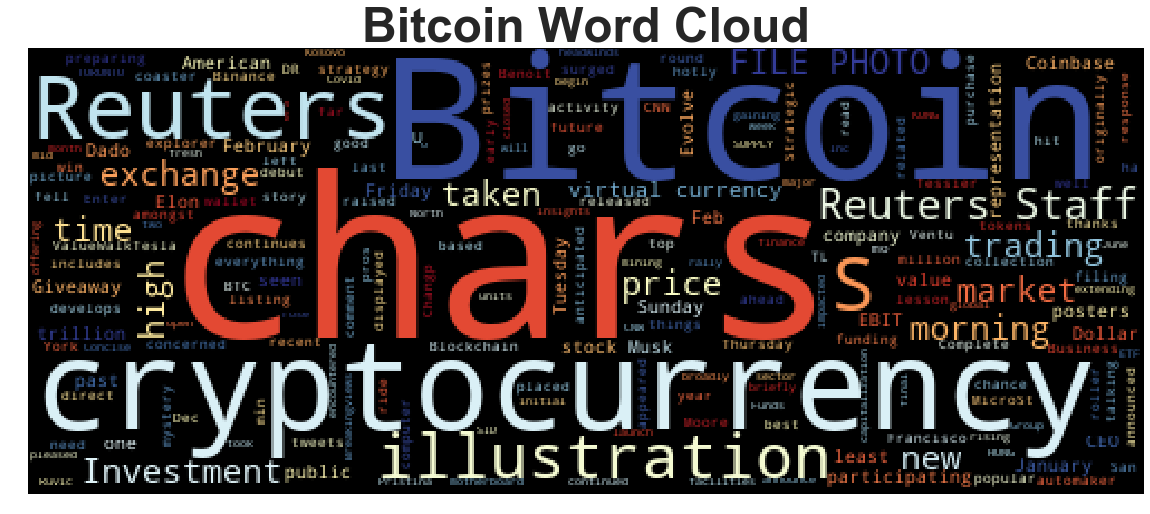

In [103]:
coin_cloud(btc_df.text.str.cat(), title="Bitcoin Word Cloud")

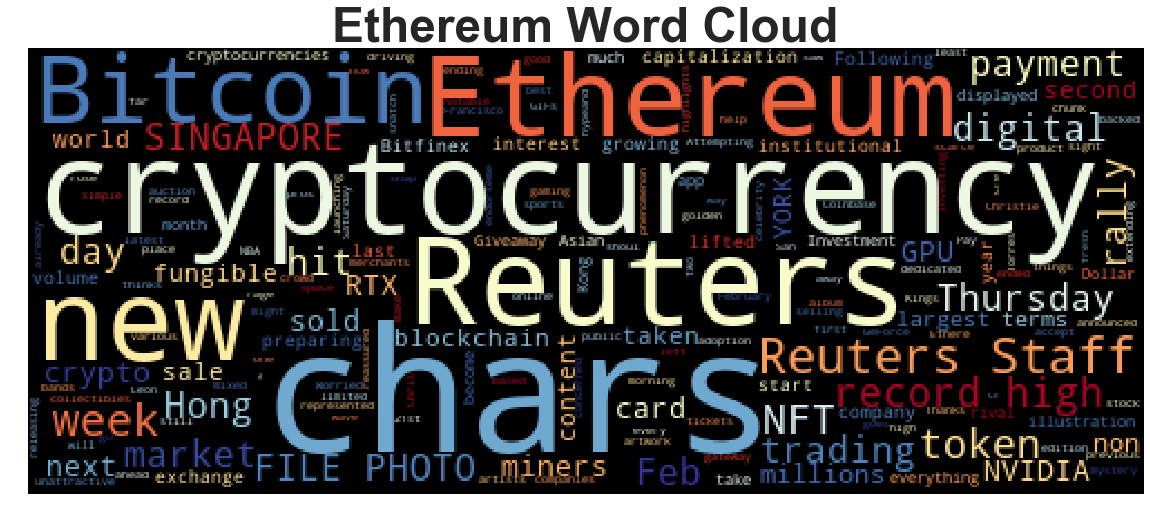

In [104]:
coin_cloud(eth_df.text.str.cat(), title="Ethereum Word Cloud")

---

## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [105]:
import spacy
from spacy import displacy

In [106]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---

## Bitcoin NER

In [107]:
# Concatenate all of the bitcoin text together
btc_text = btc_df.text.str.cat()
btc_text

'Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]Bitcoin is the future, again: this morning, it hit an all-time high value of over $50,000. Is there a lesson in here? Are Elon Musks tweets a good investment strategy? Should we get in on this? We ha… [+3198 chars]TL;DR: Enter the The Complete Bitcoin (BTC) Investment Giveaway for a chance to win over $12,000 in cryptocurrency-related prizes.\r\nThe Bitcoin Investment Giveaway includes everything you need to get… [+1641 chars]New York (CNN Business)Bitcoin\'s roller coaster ride continues. The top cryptocurrency surged to a new all-time high above $58,000 on Sunday but fell to just above $46,000 in early trading Tuesday mo… [+2159 chars]Blockchain.com has announced that it has raised a $120 million funding round. The company develops a popular cryptocurrency wallet as w

In [108]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [109]:
# Render the visualization
displacy.render(btc_doc, style='ent', jupyter=True)

In [116]:
# List all Entities
for btc_ents in btc_doc.ents:
    print(btc_ents.text, btc_ents.label_)

Coinbase ORG
San Francisco GPE
last year DATE
Thursday DATE
this morning TIME
over $50,000 MONEY
Elon Musks ORG
the The Complete Bitcoin ORG
BTC ORG
Investment Giveaway PERSON
over $12,000 MONEY
The Bitcoin Investment Giveaway EVENT
CNN ORG
Business)Bitcoin PRODUCT
58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
mo PERSON
chars]Blockchain.com PERSON
$120 million MONEY
Moore PERSON
American NORP
19, 2021 DATE
3 min QUANTITY
ValueWalkTesla ORG
Elon Musk ORG
Binance ORG
Changp PERSON
Reuters ORG
Dec. 8, 2017 DATE
REUTERS/Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
January 21, 2021 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
Sunday DATE
two-month DATE
above $1 trillion MONEY
Friday DATE
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
the Covid-19 era DATE
Feb. 19, 2021 DATE
Funds Group Inc. ORG
Bitcoin GPE
week DATE
February DATE
North American NORP
chars]7 CARDINAL
7 CARDINAL
one CA

---

### Ethereum NER

In [117]:
# Concatenate all of the bitcoin text together
eth_text = eth_df.text.str.cat()
eth_text

'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars]NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millions … [+7287 chars]NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars]While the first Christie\'s auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most notable sales in that world has already taken place. Chris Torres cr… [+1064 chars]Attempting to get ahead of cryptocurrency miners who might snatch up a good chunk of RTX 3060 stock when the GPU goes on sale next week, Nvi

In [118]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [119]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [120]:
# List all Entities
for eth_ents in eth_doc.ents:
    print(eth_ents.text, eth_ents.label_)

these days DATE
Kings PERSON
Leon PERSON
NBA ORG
millions CARDINAL
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
one CARDINAL
Chris Torres PERSON
3060 CARDINAL
GPU ORG
next week DATE
Nvidia ORG
this morning TIME
YORK PERSON
Reuters ORG
second ORDINAL
Thursday DATE
YORK PERSON
Feb 18 PERSON
Reuters ORG
second ORDINAL
Thursday DATE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ORG
the week DATE
1,935.57 MONEY
the week DATE
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex PERSON
Bitfinex Pay PERSON
millions of dollars MONEY
Reuters ORG
Reuters ORG
Bitcoin GPE
Asian NORP
Saturday DATE
two-month DATE
$1 trillion MONEY
a day earlier DATE
bitcoin GPE
 PERSONuckland
Reuters ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
Reuters ORG
SINGAPORE ORG
Feb 15 DATE
Reuters ORG
Asian NORP
hours TIME
Monday DATE
bitcoin GPE
more than 5% PERCENT
app ORG
more than a year ago DATE
the 